The dataset for this project can be found on the *UCI Machine Learning Repository*. 

Margarida G. M. S. Cardoso, margarida.cardoso '@' iscte.pt, ISCTE-IUL, Lisbon, Portugal

For the purposes of this project, the features 'Channel' and 'Region' will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [ ]:
# Import libraries necessary for this project

import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import MiniBatchKMeans
import time
import itertools


%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree



In [ ]:
# Reading the data set from cvs file from google drive.

customer_df = pd.read_csv('Data/Wholesale customers data.csv')

In [ ]:
customer_df.info()
customer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### **Verifying the null/missing values**

In [ ]:
customer_df.nunique()


Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

Wholesale customers dataset has 440 samples with 8 features each


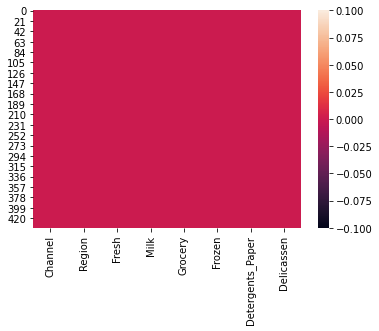

In [ ]:
# check for the null values / missing or those which can't be uploaded

customer_df.isnull().sum()
sns.heatmap(customer_df.isnull())

try:
  print ("Wholesale customers dataset has {} samples with {} features each".format(*customer_df.shape))
except:
  print ("Dataset could not be loaded. Is the dataset missing?")

### **Data Exploration**

For the purposes of this project, the features **'Channel'** and **'Region'** will be excluded in the analysis, these have less or no affect on analysis — with focus instead on the six product categories recorded for customers.


In [ ]:
customer_df.info()
customer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
# Dropping the features 'Region', 'Channel' from dataset.

customer_df.drop(['Region', 'Channel'], axis = 1, inplace = True)


customer_df.info()
customer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


We'll be exploring the data through visualizations and coding to understand how each feature is related to the others. we'll will observe a statistical description of the datasetas well, considering the relevance of each feature, and select some sample data points from the dataset which you will track through the course of this project.

We are going to use describe command to see statistical distribution of these six features. **'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',** and '**Delicatessen'**


### **Description of Categories**



*   FRESH: annual spending (m.u.) on fresh products (Continuous)

*   MILK: annual spending (m.u.) on milk products (Continuous)

*   GROCERY: annual spending (m.u.) on grocery products (Continuous)


*   FROZEN: annual spending (m.u.)on frozen products (Continuous)



*   DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)

*   DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous)

  ** "A store selling cold cuts, cheeses, and a variety of salads, as well as a selection of unusual or foreign prepared foods."





In [ ]:
customer_df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Q.1** **Can we predict which features are depended /independent to identify customer's habits and show variations in habits?** 

**Exploring the features relationship with eachother**

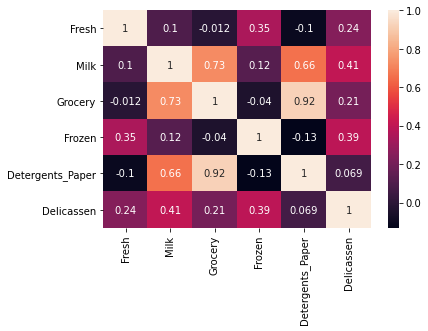

In [ ]:
sns.heatmap(customer_df.corr(),annot = True)

One intersting thought is to consider if one(or more) of these six categories/features is actually relavant to understand customer purchasing.


In [ ]:
customer_df.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Create list to loop through
dep_vars = list(customer_df.columns)


# Create loop to test each feature as a dependent variable
for var in dep_vars:

  # we 'll make a copy of the Dataframe by using 'drop' features to drop the feature each time we consider as target
  new_customer_df = customer_df.drop([var], axis = 1)
  # new_customer_df.info() - It will show that first variable has been dropped ('Fresh')
  
  # now we can create feature series (vector)
  new_customer_feature = pd.DataFrame(customer_df.loc[:, var])
  
  # we can confirm by checking info() / head() to see new features.  

  # Next we split the data into training and testing sets using giving features as targets..

  X_train, X_test, y_train, y_test = train_test_split(new_customer_df, new_customer_feature, test_size=0.25, random_state=42)


  # Next we create a decision tree regressor and fit it to the training set

  dtr = DecisionTreeRegressor(random_state=42)

  # fitting 
  dtr.fit(X_train, y_train)

  # Report the score of the prediction using the testing set
  # Returns R^2
    
  score = dtr.score(X_test, y_test)
  print('R2 score for {} as dependent variable: {}'.format(var, score))

R2 score for Fresh as dependent variable: -0.38574971020407384
R2 score for Milk as dependent variable: 0.15627539501732116
R2 score for Grocery as dependent variable: 0.6818840085440834
R2 score for Frozen as dependent variable: -0.21013589012491396
R2 score for Detergents_Paper as dependent variable: 0.27166698062685013
R2 score for Delicassen as dependent variable: -2.254711537203931


## **Visualizing Features Distribution**

**Q2. Are there any features which exhibit correlation ? Does that change the target ? or feature we are trying to predict ?**

We can do scatter plot for better understanding the features present in that dataset. More over to see if data is normaly distributed ? and where most of the data lies?


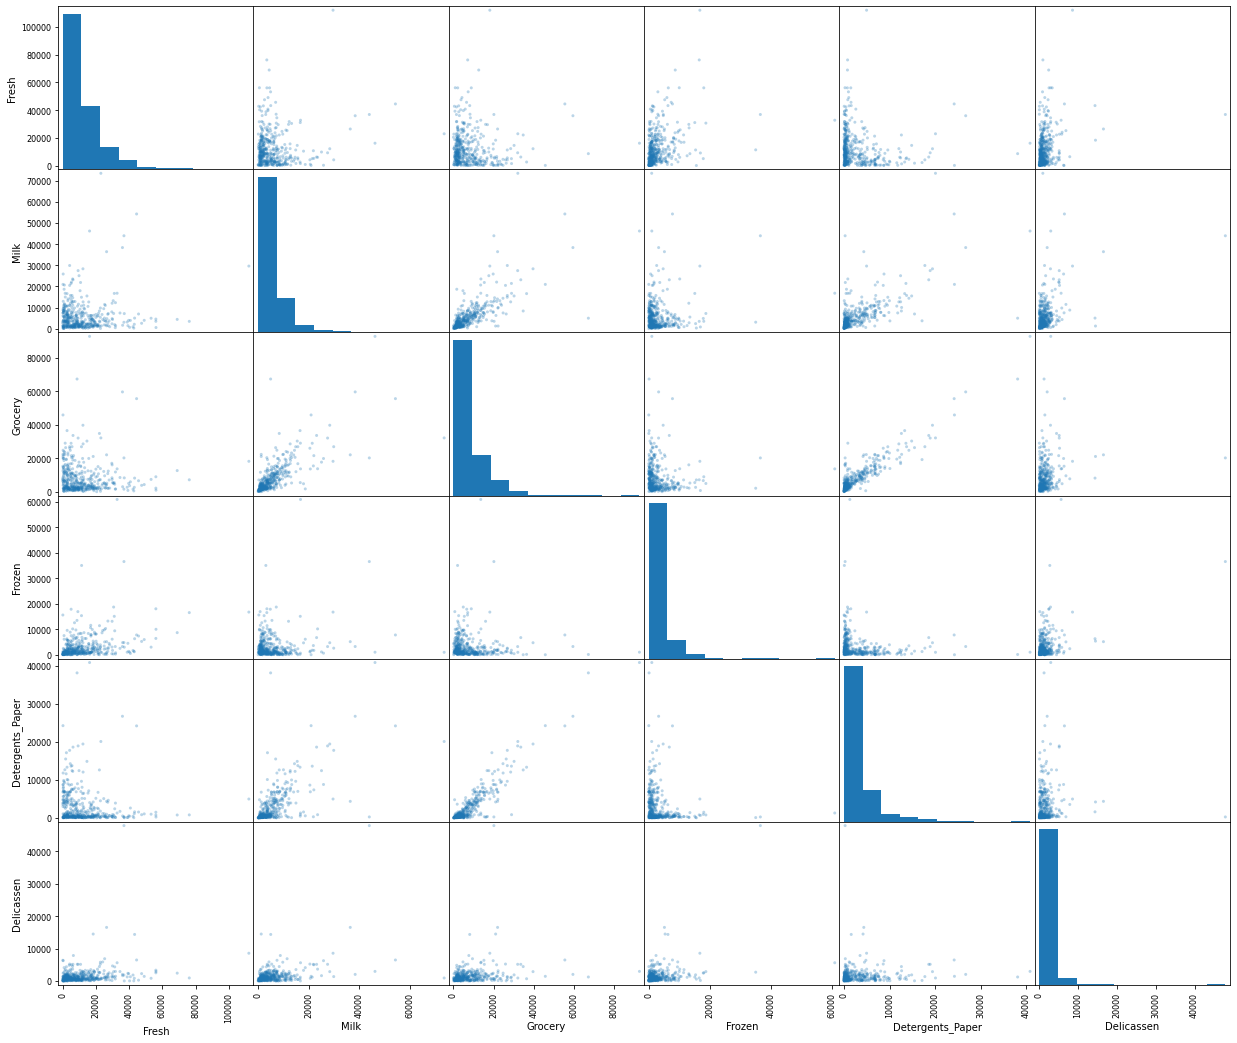

In [ ]:
# Creating scatter plot for the features in dataset

# pd.plotting.scatter_matrix(customer_df, alpha= 0.3, figsize = (21,18), diagonal = 'kde');

pd.plotting.scatter_matrix(customer_df, alpha= 0.3, figsize = (21,18));

Corss matrix shows the insight of the data, more higher the color bar, higher is the correlation between these features.

Lets reexamine the correlation plot ..

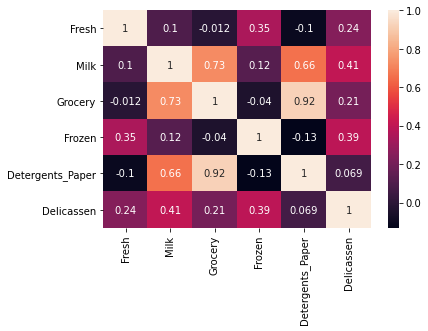

In [ ]:
# Re computing heat map of features in the dataset
sns.heatmap(customer_df.corr(),annot = True)

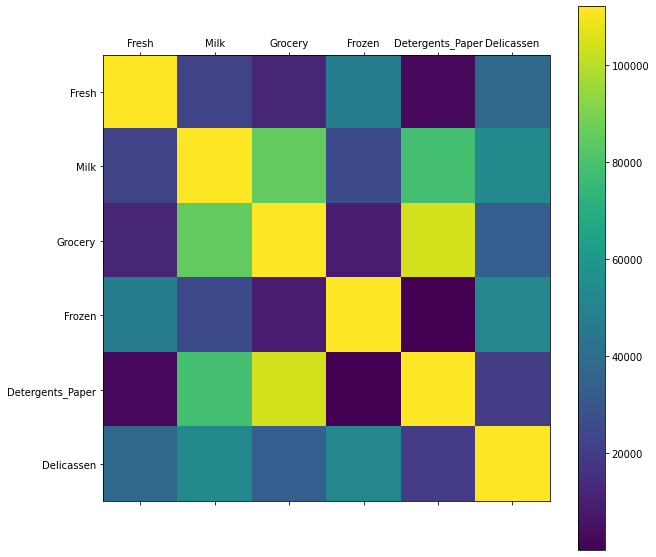

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);


plot_corr(customer_df)


We have tested the correlation matrix by crossploting , heat map and correlation map.

1. The follow pairs of features seem to have some correlation as observed from the scatter plot showing a linear trend and the correlation plot showing a high correlation between the two features.

 *   Grocery and Detergents_Paper.
 *   Grocery and Milk.
 *   Detergents_Paper and Milk (not too strong).

2. These features that are strongly correlated

 *   Grocery has a high correlation with Detergents_Paper and Milk that corresponds to a relatively high R2 score when we regress Grocery on all other features.






## **Data Processing**

Lets examining the data distribution and see if there are any outliers exist which needed to be taken care off..

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

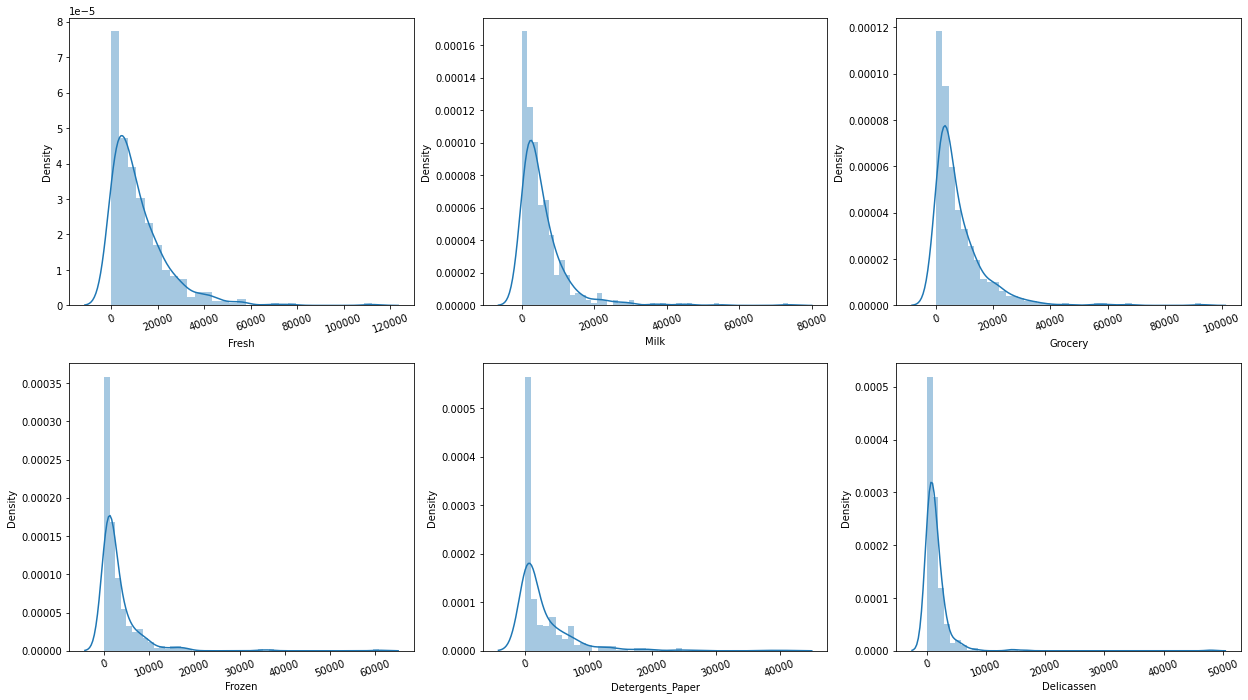

In [ ]:
plt.figure(figsize=(21, 18))
features = customer_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper','Delicassen']]

                   
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(features[i[1]])
    plt.xticks(rotation=20);

The histogram shows data is not normally distributed.



  *   Mostly skeweed towards left showing more data points lie there

  *   This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.



If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply a non-linear scaling — particularly for financial data. 

One way to achieve this scaling is by using a Box-Cox test, which calculates the best power transformation of the data that reduces skewness. 
There are couple of ways we can do this scaling ..

*   We can also try to apply standard scaling on the dataset 

*   A simpler approach which can work in most cases would be applying the natural logarithm.



In [ ]:
# Displaying Standard Scalar

scalar = StandardScaler() 
scaled_customer_df = scalar.fit_transform(customer_df) 
# displaying the scalled data 
scaled_customer_df_real = pd.DataFrame(scaled_customer_df, index=customer_df.index, columns=customer_df.columns) 

scaled_customer_df_real.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


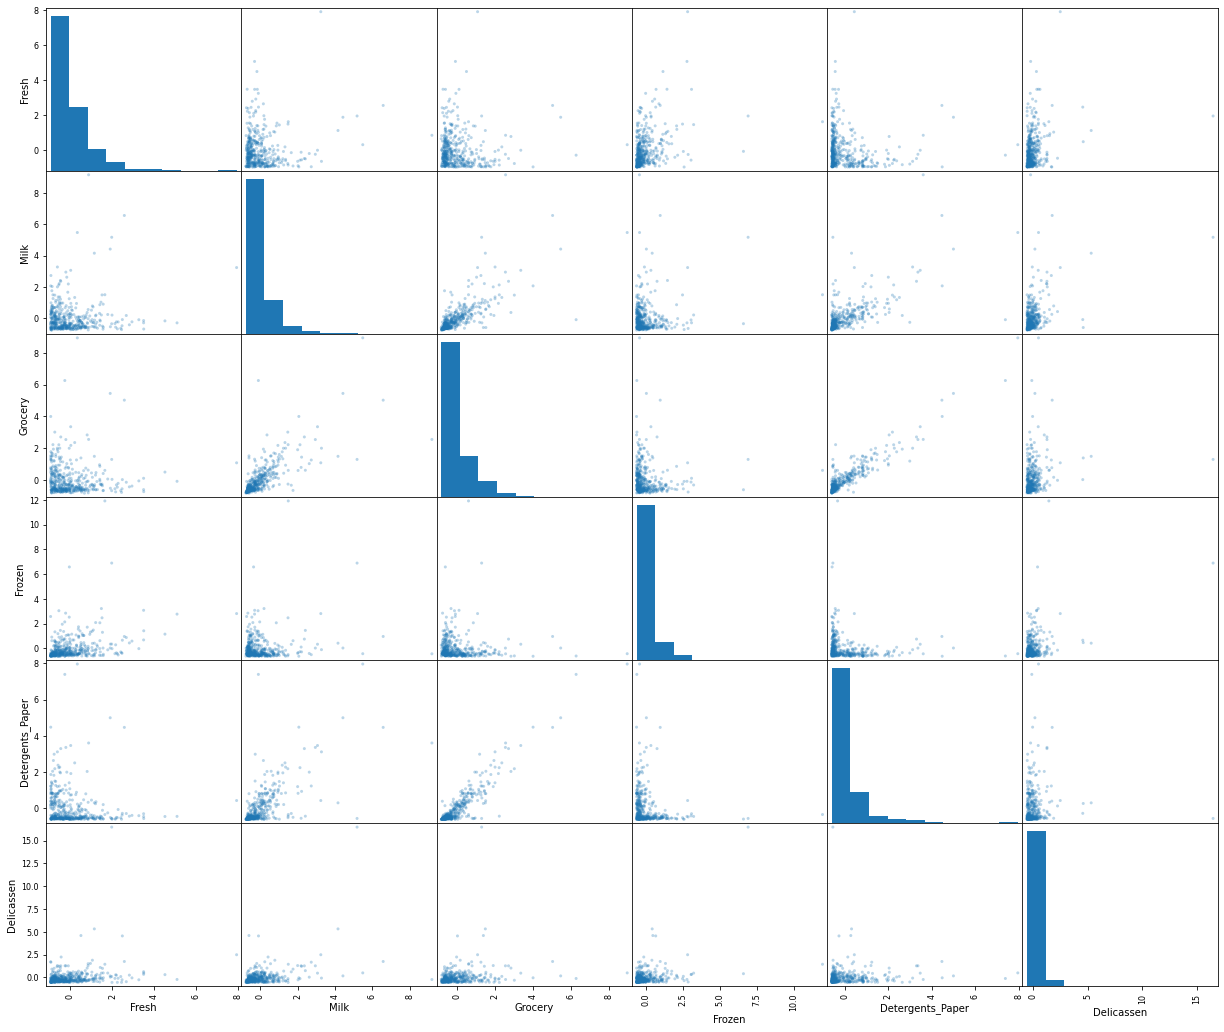

In [ ]:
pd.plotting.scatter_matrix(scaled_customer_df_real, alpha= 0.3, figsize = (21,18));

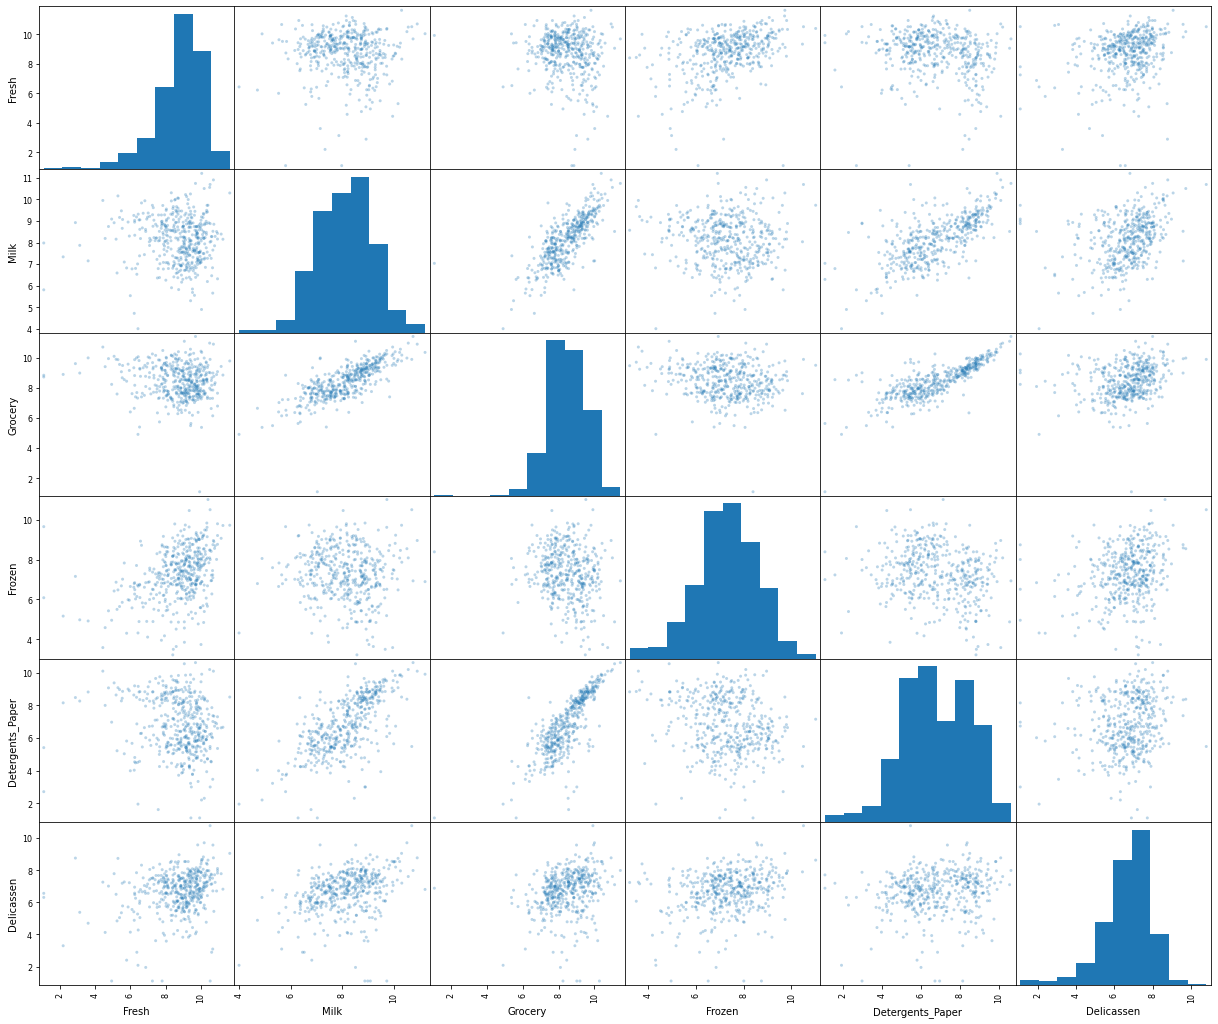

In [ ]:
# Apply scaling using logrithmic scalar

# TODO: Scale the data using the natural logarithm
log_customer_df = np.log(customer_df)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_customer_df, alpha= 0.3, figsize = (21,18));

After performing the scaling, we see standard scaling didn't change much of the data , however logrithmic scaling has changed the data and distribution of each feature looks much normal now. 

Lets observe that if correlation still the same.


customer_df


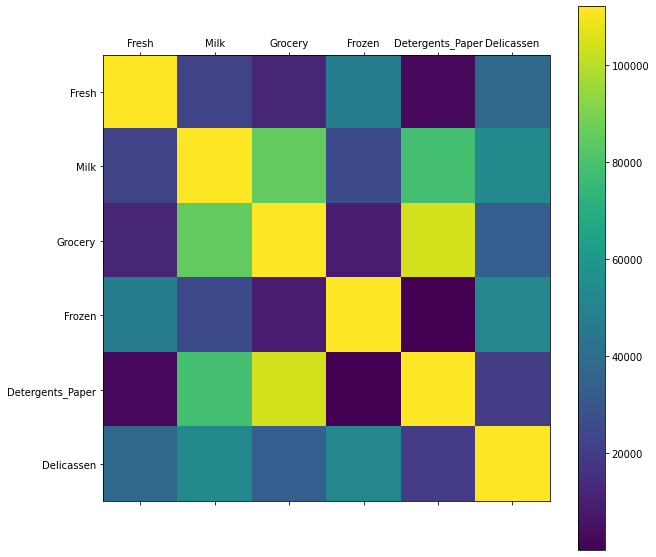

In [ ]:
plot_corr(customer_df)
print('customer_df')

scaled_customer_df_real


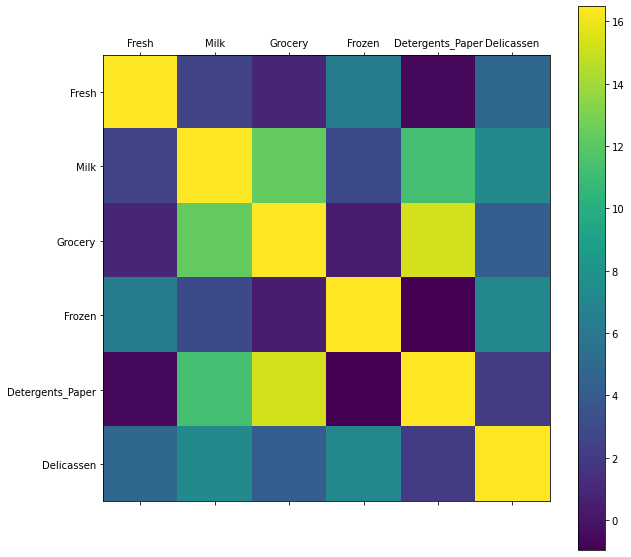

In [ ]:
plot_corr(scaled_customer_df_real)
print('scaled_customer_df_real')


log_customer_df


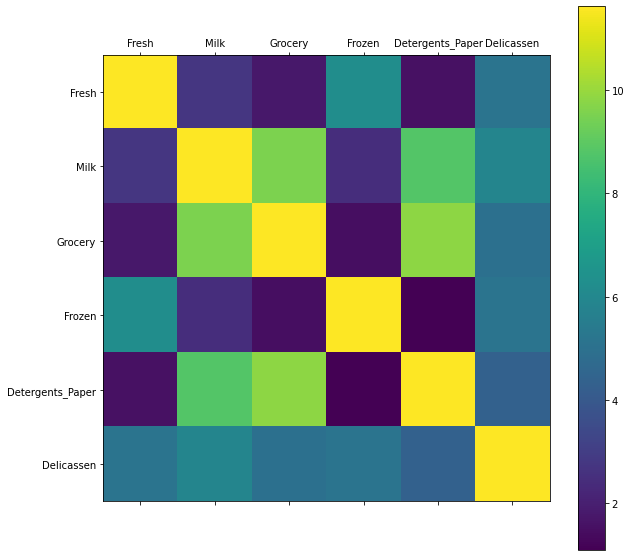

In [ ]:
plot_corr(log_customer_df)
print('log_customer_df')

After performing the scalar we notice change in correlation.

1. Non Scaled Data  

* Grocery and Detergent show stronger correlation
* Grocery and Milk show slightly stronger correlation
* Detergent_paper and Milk show slightly stronger correlation


2. Standard Scaled Data

* Grocery and Detergent show stronger correlation
* Grocery and Milk show slightly stronger correlation
* Detergent_paper and Milk show slightly stronger correlation

3. Logrithmic Scaled Data


* Grocery and Detergent show weeker correlation
* Grocery and Milk show stronger correlation
* Detergent_paper and Milk show slightly stronger correlation

## **Implementation : Outlier Detection and removal**

We can attempt different methods to detect the outlier and here we'll use Boxplot and Tukey's methods.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

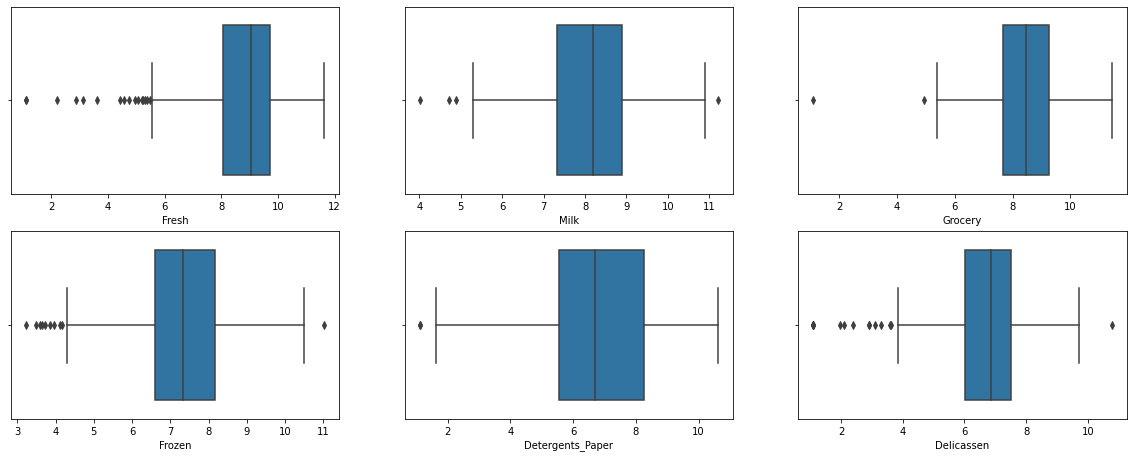

In [ ]:
plt.figure(figsize = (20,20))

for i in enumerate(log_customer_df.columns[0:]):
  plt.subplot(5,3,i[0] + 1)
  sns.boxplot(log_customer_df[i[1]])

### **Tukey's method**

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use Tukey's Method for identfying outliers: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:




*   Assign the value of the 25th percentile for the given feature to Q1. Use np.percentile for this.

*   Assign the value of the 75th percentile for the given feature to Q3. Again, use np.percentile

*  Assign the calculation of an outlier step for the given feature to step.


*   Optionally remove data points from the dataset by adding indices to the outliers list.



In [ ]:
# Select the indices for data points you wish to remove
outliers_lst  = []

# For each feature find the data points with extreme high or low values
for feature in log_customer_df.columns:
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_customer_df.loc[:, feature], 25)

    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_customer_df.loc[:, feature], 75)

    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)

    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))

    # The tilde sign ~ means not
    # So here, we're finding any points outside of Q1 - step and Q3 + step
    outliers_rows = log_customer_df.loc[~((log_customer_df[feature] >= Q1 - step) & (log_customer_df[feature] <= Q3 + step)), :]
    # display(outliers_rows)

    outliers_lst.append(list(outliers_rows.index))

outliers = list(itertools.chain.from_iterable(outliers_lst))

# List of unique outliers
# We use set()
# Sets are lists with no duplicate entries
uniq_outliers = list(set(outliers))

# List of duplicate outliers
dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))

print ('Outliers list:\n', uniq_outliers)
print ('Length of outliers list:\n', len(uniq_outliers))

print ('Duplicate list:\n', dup_outliers)
print ('Length of duplicates list:\n', len(dup_outliers))

# Remove duplicate outliers
# Only 5 specified
good_customer_df = log_customer_df.drop(log_customer_df.index[dup_outliers]).reset_index(drop = True)

# Original Data 
print ('Original shape of data:\n', customer_df.shape)
# Processed Data
print ('New shape of data:\n', good_customer_df.shape)

Data points considered outliers for the feature 'Fresh':
Data points considered outliers for the feature 'Milk':
Data points considered outliers for the feature 'Grocery':
Data points considered outliers for the feature 'Frozen':
Data points considered outliers for the feature 'Detergents_Paper':
Data points considered outliers for the feature 'Delicassen':
Outliers list:
 [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]
Length of outliers list:
 42
Duplicate list:
 [128, 65, 66, 75, 154]
Length of duplicates list:
 5
Original shape of data:
 (440, 6)
New shape of data:
 (435, 6)


Now comparing the dataset with and without outliers.

Scaled Data with outlier


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

.....................................................
Scaled Data without outlier


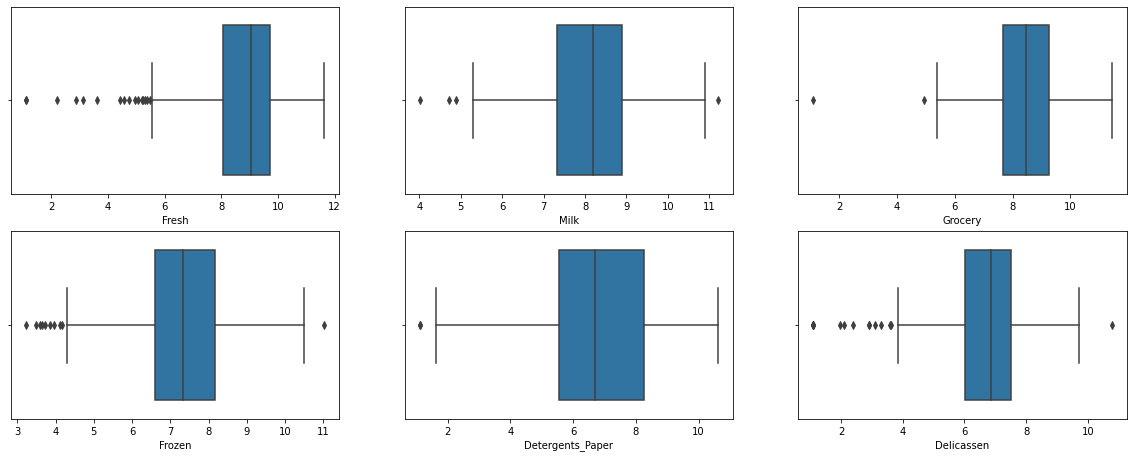

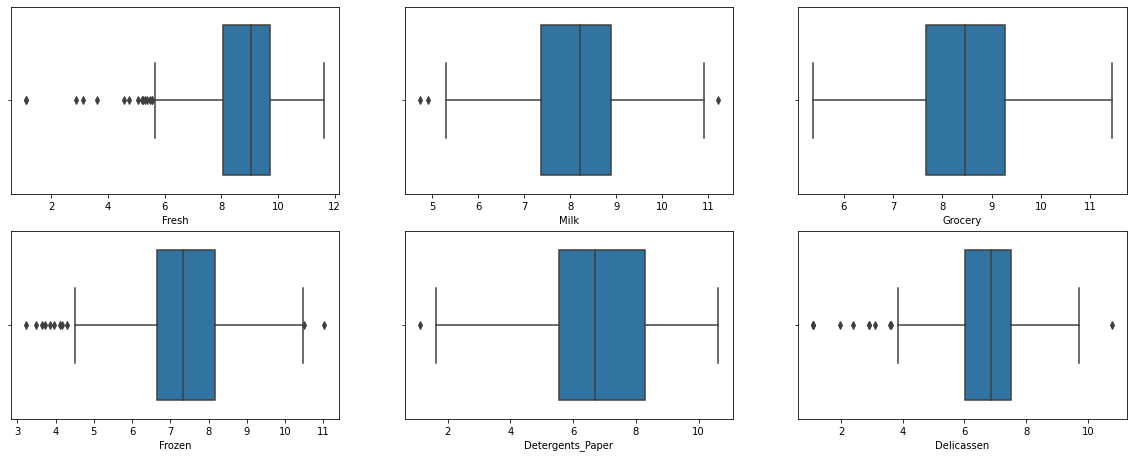

In [ ]:
# Scaled data with outlier

print('Scaled Data with outlier')

plt.figure(figsize = (20,20))

for i in enumerate(log_customer_df.columns[0:]):
  plt.subplot(5,3,i[0] + 1)
  sns.boxplot(log_customer_df[i[1]])

print(".....................................................")

# Scaled data without outlier

print('Scaled Data without outlier')

plt.figure(figsize = (20,20))

for i in enumerate(good_customer_df.columns[0:]):
  plt.subplot(5,3,i[0] + 1)
  sns.boxplot(good_customer_df[i[1]]);


Tukey's method show there are 5 lists which are duplicate and removed in new dataset. Visuals also show the difference between with and without outlier datasets.

1. Specifically there are 5 examples that have duplicates.

  * Their indices are in this array: [128, 65, 66, 75, 154].
2. They should be removed as they are not only outliers in one categories but more than once.
  * Hence, they are not representative of our general customers.

In [ ]:
#printing out the index of the max of each catagory.
print (customer_df.idxmax(axis=0, skipna=True))

Fresh               181
Milk                 86
Grocery              85
Frozen              325
Detergents_Paper     85
Delicassen          183
dtype: int64


## **PCA and Dimentiality Reduction**

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the good_data to discover which dimensions about the data best maximize the variance of features involved.

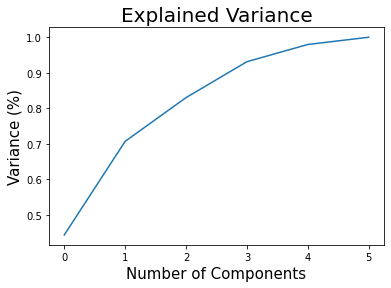

In [ ]:
# pass through the scaled data set into our PCA class object
pca = PCA().fit(good_customer_df)

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()


In [ ]:
# we will choose 5 pca components and create a new dataset

customer_pca_df = PCA(n_components=6).fit(good_customer_df).transform(good_customer_df)

# store it in a new data frame
customer_pca_df = pd.DataFrame(data = customer_pca_df, columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6'])


customer_pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6
0,-1.757983,0.009711,-0.959029,-1.682450,0.268019,-0.389131
1,-1.788665,-0.812251,0.231474,-0.003631,0.119381,-0.210648
2,-1.883353,-1.599135,1.320393,-0.543246,-0.393355,-0.311669
3,1.155265,-1.405201,0.542235,0.412669,-0.686453,0.640936
4,-0.784786,-2.394294,0.479768,-0.348316,-0.319098,0.061325


### **Implementation: PCA**

Implementing PCA with user define code and see the variance.

In [ ]:

def pca_results(good_customer_df, pca):
  '''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

  PComponents = ['PComponents {}'.format(i) for i in range(1,len(pca.components_)+1)]
  
  # PCA components
  components =pd.DataFrame(np.round(pca.components_, 4), columns = good_customer_df.keys())
  components.index = PComponents

  # PCA explained variance
  ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
  variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
  variance_ratios.index = PComponents

  # Create a bar plot visualization
  fig, ax = plt.subplots(figsize = (14,8))

  # Plot the feature weights as a function of the components
  components.plot(ax = ax, kind = 'bar');
  ax.set_ylabel("Feature Weights")
  ax.set_xticklabels(PComponents, rotation=0)

  # Display the explained variance ratios
  for i, ev in enumerate(pca.explained_variance_ratio_):
    ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))
  
  # Return  a concatenated DataFrame
  return pd.concat([variance_ratios, components], axis = 1)


def cluster_results(reduced_data, preds, centers, pca_samples):
  '''
  Visualizes the PCA-reduced cluster data in two dimensions
  Adds cues for cluster centers
  '''

  predictions = pd.DataFrame(preds, columns = ['Cluster'])
  plot_data = pd.concat([predictions, reduced_data], axis = 1)

  # Generate the Cluster Plots
  fig, ax = plt.subplots(figsize = (14,8))

  # Color map
  cmap = cm.get_cmap('gist_rainbow')

  # Color the points based on assigned cluster
  for i, cluster in plot_data.groupby('Cluster'):
    cluster.plot(ax = ax, kind = 'scatter', x = 'PComponent 1', y = 'PComponent 2', \
                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);


  # Plot centers with indicators
  for i, c in enumerate(centers):
    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
              alpha = 1, linewidth = 2, marker = 'o', s=200);
    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);



    # plot transformed sample points
    ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
               s = 150, linewidth = 4, color = 'black', marker = 'x'); 


    # set plot title
    ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");



def channel_results(reduced_data, outliers, pca_samples):
  '''
  Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
  Data is labeled by "Channel" and cues added for student-selected sample data
  '''

  # Check the dataset is loadable

  try:
    customer_df = pd.read_csv('/content/drive/MyDrive/Unsupervised Learning - Capstone Project/Wholesale customers data _unsupervised_learning_capstone.csv')
  except:
    print("Dataset could not be loaded. Is the file missing?")
    return False


    # Create the channel DataFrame
    channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
    channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
    labeled = pd.concat([reduced_data, channel], axis = 1)

    # Generate the cluster plot
    fig, ax = plt.subplots(figsize = (14,8))

    # Color map
    cmap = cm.get_cmap('gist_rainbow')

    # Color the points based on assigned Channel

    labels = ['Hotel/Restaurant/Cafe', 'Retailer']
    grouped = labeled.groupby('Channel')

    for i, channel in grouped:
      channel.plot(ax = ax, kind = 'scatter', x = 'PComponent 1', y = 'PComponent 2', \
                   color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);

    # Plot transformed samples points
    for i, sample in enumerate(pca_samples):
      ax.scatter.plot(x = sample[0], y = sample[1], \
                    s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
      ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

    # Set Plot Title
    ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");






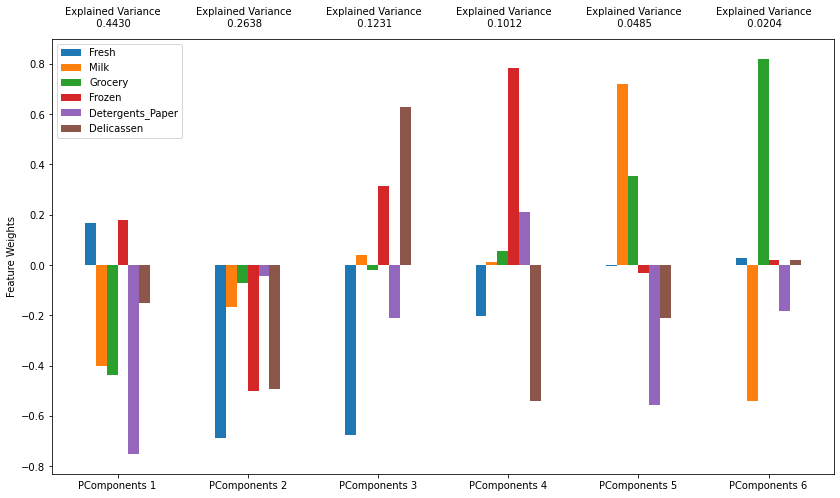

In [ ]:


pca = PCA(n_components=len(good_customer_df.keys())).fit(good_customer_df)

pca.fit(good_customer_df)

# Generate PCA results plot
pca_results = pca_results(good_customer_df, pca)

In [ ]:
# DataFrame of results
display(pca_results)

# DataFrame
display(type(pca_results))

# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
PComponents 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
PComponents 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
PComponents 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
PComponents 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
PComponents 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
PComponents 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


pandas.core.frame.DataFrame

PComponents 1    0.4430
PComponents 2    0.7068
PComponents 3    0.8299
PComponents 4    0.9311
PComponents 5    0.9796
PComponents 6    1.0000
Name: Explained Variance, dtype: float64

Here we observed 6 different PCA values,

 * 70.68% of the variance in the data is explained by the first and second principal components.

 * 93.11% of the variance in the data is explained by the first four principal components.


 1. PCA 1

    * An increase in PC1 is associated with large increases in "Milk", "Grocery" and "Detergents_Paper" spending.
    * This is in line with our initial findings where the 3 features are highly correlated.

2. PCA 2
    * An increase in PC2 is associated with large increases in "Fresh", "Frozen" and "Delicatessen" spending.
    * This makes sense as PC1 represents different features. And in PC2, the features in PC1 have very small positive weights.

3. PCA 3
    * An increase in PC3 is associated with a large increase in "Delicatessen" and a large decrease in "Fresh" spending.

4. PCA 4
    * An increase in PC4 is associated with a large increasing in "Frozen" and a large decrease in "Delicatessen" spending.


## **Dimensionality Reduction**

By using principal component analysis, we can reduce the dimentiality of the data, ineffect, reducing the complexity of the problem. 
But dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In [ ]:
# Let apply PCA by fitting the data with only two dimensions
# Instantiate
pca = PCA(n_components=2)
pca.fit(good_customer_df)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_customer_df)

# Create a DataFrame for the reduced data
reduced_pca_data = pd.DataFrame(reduced_data, columns = ['PComponents 1', 'PComponents 2'])

reduced_pca_data.head()


,PComponents 1,PComponents 2
0,-1.757983,0.009711
1,-1.788665,-0.812251
2,-1.883353,-1.599135
3,1.155265,-1.405201
4,-0.784786,-2.394294


Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

## **Clustering**

Next step is to perform clustering to identify the various customer segments hidden in the data. Then we;ll recover specific data points from clusters to understand their significance by transfering them back to origional dimensions and scale.

### **K-Means**

We'll be try first K-Means Clustering algorithm and here are the key points.

  *  points in the same cluster has shorter than points from other clusters.

  * The goal is to minimize the distance within the same cluster.
  * Points belong explicitly to clusters
  * Easy to understand and implement.


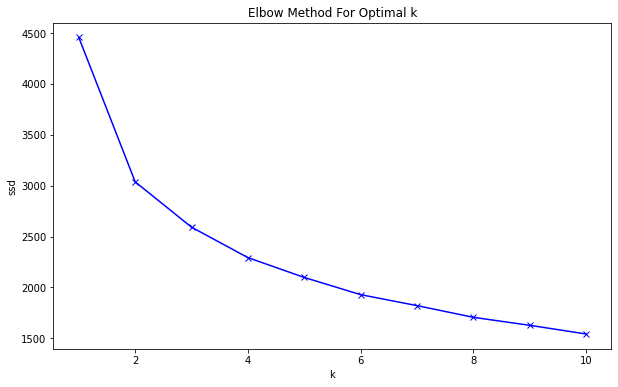

In [ ]:
# Lets check the range of haw many clusters we might need for this dataset

ssd = []
K = range(1,11)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(good_customer_df)
    ssd.append(km.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('Elbow Method For Optimal k')
plt.show()


IT appears that clusters from 2-10 can be tested for performence. For further consideration we'll compute the "Average silhouette sscore".

In [ ]:
# Create range of clusters 

range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
# Loop through clusters
for n_clusters in range_n_clusters:

    # Applying clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_pca_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_pca_data)

    # Finding the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_pca_data, preds, metric='euclidean')
    
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.42628101546910835
For n_clusters = 3. The average silhouette_score is : 0.3974234200078323
For n_clusters = 4. The average silhouette_score is : 0.3316420596309083
For n_clusters = 5. The average silhouette_score is : 0.352208874352643
For n_clusters = 6. The average silhouette_score is : 0.3629618278871421
For n_clusters = 7. The average silhouette_score is : 0.3648753591099507
For n_clusters = 8. The average silhouette_score is : 0.3654878077404171
For n_clusters = 9. The average silhouette_score is : 0.3625369723424693
For n_clusters = 10. The average silhouette_score is : 0.36023194426892974


We can also perform this step ands represent the graph between clusters and silhouette score, which will show specifically which cluster has higher silhouette score.

NOTE: 

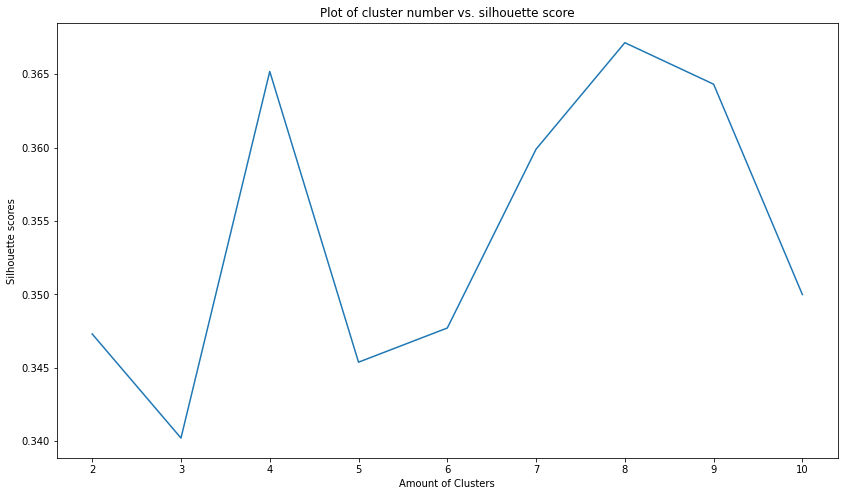

Optimum score: 0.3671


In [ ]:
def score_KMeans(n_clusters):
  for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_pca_data)
  

  # Predict the cluster for each data point
  preds = clusterer.predict(reduced_pca_data)
    
  # Find the cluster centers
  centers = clusterer.cluster_centers_

  # Calculate the mean silhouette coefficient for the number of clusters chosen
  score = silhouette_score(reduced_pca_data, preds, metric = 'euclidean')
  return score
    
# Make an array of different silhouette_scores for clusters from 2 to 11.
KMeans_scores = []

for i in range(2,11):
  KMeans_scores.append(score_KMeans(i))

#Plot silhouette scores for a variety of cluster numbers.
plt.figure(figsize= (14,8))
plt.plot(range(2,11),KMeans_scores)
plt.xlabel('Amount of Clusters')
plt.ylabel('Silhouette scores')
plt.title('Plot of cluster number vs. silhouette score')
plt.show()
print ('Optimum score: {:.4f}'.format(max(KMeans_scores)))

From the silhouette score, its evident that clusters, 2,3, 4 and 5 have higher score and we can visualize those.

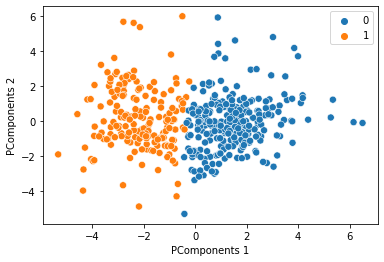

In [ ]:
kmean = KMeans(n_clusters=2)
kmean.fit(reduced_pca_data)

pred = kmean.labels_


sns.scatterplot(data= reduced_pca_data, s=50, x = 'PComponents 1',y = 'PComponents 2',hue=kmean.labels_)

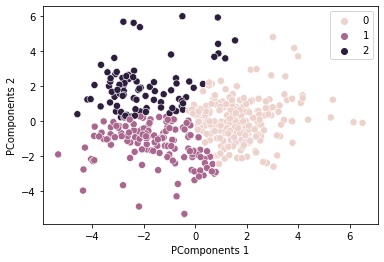

In [ ]:
# n_clusters = 3

kmean = KMeans(n_clusters=3)
kmean.fit(reduced_pca_data)

pred = kmean.labels_


sns.scatterplot(data= reduced_pca_data, s=50, x = 'PComponents 1',y = 'PComponents 2',hue=kmean.labels_)

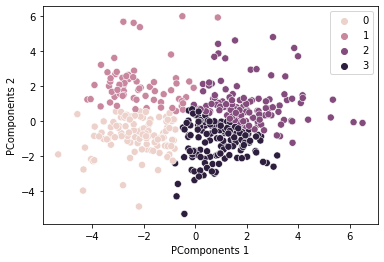

In [ ]:
# n_clusters = 4

kmean = KMeans(n_clusters=4)
kmean.fit(reduced_pca_data)

pred = kmean.labels_


sns.scatterplot(data= reduced_pca_data, s=50, x = 'PComponents 1',y = 'PComponents 2',hue=kmean.labels_)

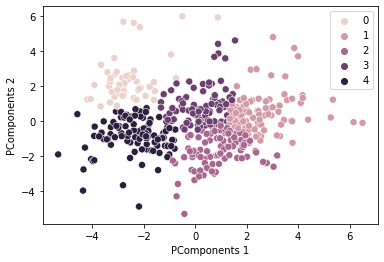

In [ ]:
# n_clusters = 5

kmean = KMeans(n_clusters=5)
kmean.fit(reduced_pca_data)

pred = kmean.labels_


sns.scatterplot(data= reduced_pca_data, s=50, x = 'PComponents 1',y = 'PComponents 2',hue=kmean.labels_)

## **Implementation: Data Recovery**

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. 

For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [ ]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = good_customer_df.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,7116.0,7076.0,9926.0,1495.0,3071.0,1344.0
Segment 1,6207.0,2141.0,2958.0,1568.0,412.0,599.0
Segment 2,1697.0,9393.0,16425.0,485.0,8359.0,705.0
Segment 3,3640.0,1240.0,1824.0,1120.0,194.0,316.0
Segment 4,16752.0,2289.0,2735.0,3308.0,323.0,1099.0


Considering the total purchase cost of each product category for the representative data points, and reference the statistical description of the dataset at the beginning of this project. What set of establishments could each of the customer segments represent?

In [ ]:
# Clusters' deviation from median

print('Clusters deviation from median')
display(true_centers - good_customer_df.median())

print('...................................')


# Clusters' deviation from mean
print('Clusters deviation from mean')
# As you can see, this is not a meaningful comparison for Segment 1 where everything is negative
display(true_centers - good_customer_df.mean())

Clusters deviation from median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,7106.944561,7067.801911,9917.532628,1487.659813,3064.299269,1337.125802
Segment 1,6197.944561,2132.801911,2949.532628,1560.659813,405.299269,592.125802
Segment 2,1687.944561,9384.801911,16416.532628,477.659813,8352.299269,698.125802
Segment 3,3630.944561,1231.801911,1815.532628,1112.659813,187.299269,309.125802
Segment 4,16742.944561,2280.801911,2726.532628,3300.659813,316.299269,1092.125802


...................................
Clusters deviation from mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,7107.233329,7067.871624,9917.539764,1487.675399,3064.200992,1337.305651
Segment 1,6198.233329,2132.871624,2949.539764,1560.675399,405.200992,592.305651
Segment 2,1688.233329,9384.871624,16416.539764,477.675399,8352.200992,698.305651
Segment 3,3631.233329,1231.871624,1815.539764,1112.675399,187.200992,309.305651
Segment 4,16743.233329,2280.871624,2726.539764,3300.675399,316.200992,1092.305651


Statistical descrition of of origional dataset

In [ ]:
med_values = np.around(customer_df.median().values)

for i, cat in enumerate(customer_df.columns):
    print ("Median values for {}: ${:.2f}".format(cat, med_values[i]))


display(customer_df.describe())


Median values for Fresh: $8504.00
Median values for Milk: $3627.00
Median values for Grocery: $4756.00
Median values for Frozen: $1526.00
Median values for Detergents_Paper: $816.00
Median values for Delicassen: $966.00


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Analysis**

1. We will be using deviations from the median, with reference to the statistical description of the dataset at the beginning of this project, since mean is sensitive to outliers and would not yield meaningful comparisons.


*   Segment 0:

     *  It shows that in the segment 0, we observe spending on 'Fresh',and  'Frozen' are above the median, where as spending on 'Milk' and 'Grocery' is less than median.
     * This might be seafood stores.

*   Segment 1:

    * It shows that in segment 1, we obser increase on spending  on 'Milk', 'Grocery' and on 'Detergent_Papers. 
    * This might represent resturants/retailers, cafes, etc..




In [ ]:

# Display the predictions
for i, pred in enumerate(good_customer_df):
    print("Data point", i, 'predicted to be in Cluster', pred)

Data point 0 predicted to be in Cluster Fresh
Data point 1 predicted to be in Cluster Milk
Data point 2 predicted to be in Cluster Grocery
Data point 3 predicted to be in Cluster Frozen
Data point 4 predicted to be in Cluster Detergents_Paper
Data point 5 predicted to be in Cluster Delicassen


In [ ]:
# Display the predictions
for i, pred in enumerate(reduced_pca_data):
    print("Data point", i, 'predicted to be in Cluster', pred)

Data point 0 predicted to be in Cluster PComponents 1
Data point 1 predicted to be in Cluster PComponents 2


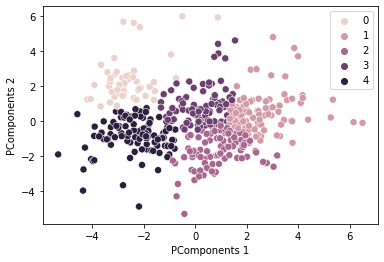

In [ ]:


sns.scatterplot(data= reduced_pca_data, s=50, x = 'PComponents 1',y = 'PComponents 2',hue=kmean.labels_)

## **Conclusion:**


As per our results, segment 0 represents the customers that sell food to prepare themselves ( supermarket, foodstores, retailers) and Segment 1 represent the customers who sell made food like, resturants , cafes etc.

Assuming that if the owner made a slight change inorder to enhance its services having impact on sale. He decided to change his delivery from 5 days to 3 days.

Impact:

1. It would have minimimal impact on customers with 'segment 0' coz these are food items whic can kept in stock.

2. It would have higher impact on customers with 'segment 1' as they need to prepare the food and delievered when needed, so they would most likely be the candidate for 3 days deleivery.

## **Clustering : GMM**

In [ ]:
# Loop through clusters
for n_clusters in range_n_clusters:

    # Applying clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters).fit(reduced_pca_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_pca_data)

    # Finding the cluster centers
    centers = clusterer.means_

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_pca_data, preds, metric='euclidean')
    
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.4219168464626149
For n_clusters = 3. The average silhouette_score is : 0.37781736386963943
For n_clusters = 4. The average silhouette_score is : 0.2648661939130228
For n_clusters = 5. The average silhouette_score is : 0.3377275276519302
For n_clusters = 6. The average silhouette_score is : 0.2841893027395526
For n_clusters = 7. The average silhouette_score is : 0.33234796780104675
For n_clusters = 8. The average silhouette_score is : 0.3463504440811718
For n_clusters = 9. The average silhouette_score is : 0.32206892334520554
For n_clusters = 10. The average silhouette_score is : 0.29135965845874184


**The best score is obtained when the number of clusters is 2. Similarly, when we used KMeans, the best score is also obtained with the same number of clusters.**

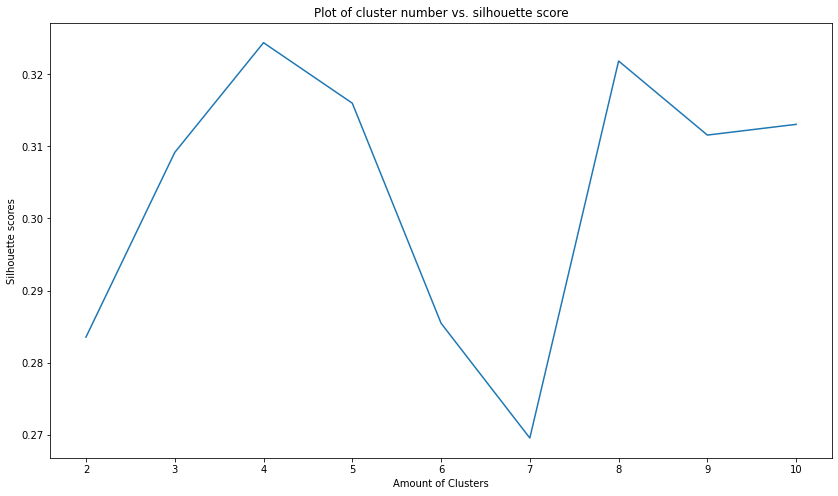

Optimum score: 0.3671


In [ ]:
def score_GMM(n_clusters):
  for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters).fit(reduced_pca_data)
  

  # Predict the cluster for each data point
  preds = clusterer.predict(reduced_pca_data)
    
  # Find the cluster centers
  centers = clusterer.means_

  # Calculate the mean silhouette coefficient for the number of clusters chosen
  score = silhouette_score(reduced_pca_data, preds, metric = "mahalanobis")
  return score
    
# Make an array of different silhouette_scores for clusters from 2 to 11.
GMM_scores = []

for i in range(2,11):
  GMM_scores.append(score_GMM(i))

#Plot silhouette scores for a variety of cluster numbers.
plt.figure(figsize= (14,8))
plt.plot(range(2,11),GMM_scores)
plt.xlabel('Amount of Clusters')
plt.ylabel('Silhouette scores')
plt.title('Plot of cluster number vs. silhouette score')
plt.show()
print ('Optimum score: {:.4f}'.format(max(KMeans_scores)))

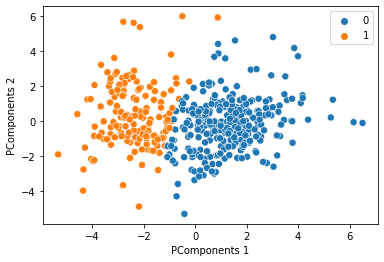

In [ ]:
# Displaying GMM with 2 clusters

clusterer = GaussianMixture(n_components=2).fit(reduced_pca_data)
preds = clusterer.predict(reduced_pca_data)

centers = clusterer.means_


sns.scatterplot(data= reduced_pca_data, s=50, x = 'PComponents 1', y = 'PComponents 2', hue = clusterer.predict(reduced_pca_data))

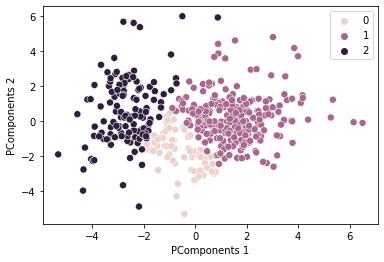

In [ ]:
# Displaying GMM with 3 clusters

clusterer = GaussianMixture(n_components=3).fit(reduced_pca_data)
preds = clusterer.predict(reduced_pca_data)

centers = clusterer.means_


sns.scatterplot(data= reduced_pca_data, s=50, x = 'PComponents 1', y = 'PComponents 2', hue = clusterer.predict(reduced_pca_data) )

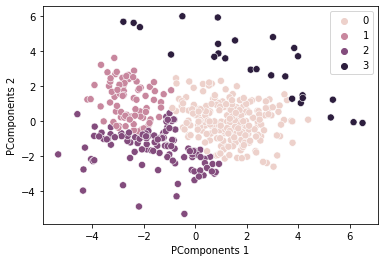

In [ ]:
# Displaying GMM with 4 clusters

clusterer = GaussianMixture(n_components=4).fit(reduced_pca_data)
preds = clusterer.predict(reduced_pca_data)

centers = clusterer.means_


sns.scatterplot(data= reduced_pca_data, s=50, x = 'PComponents 1', y = 'PComponents 2', hue = clusterer.predict(reduced_pca_data) )

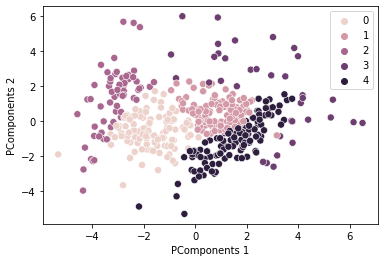

In [ ]:
# Displaying GMM with 5 clusters

clusterer = GaussianMixture(n_components=5).fit(reduced_pca_data)
preds = clusterer.predict(reduced_pca_data)

centers = clusterer.means_


sns.scatterplot(data= reduced_pca_data, s=50, x = 'PComponents 1', y = 'PComponents 2', hue = clusterer.predict(reduced_pca_data) )

## **Implementation: Data Recovery**

Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the averages of all the data points predicted in the respective clusters. 

For the problem of creating customer segments, a cluster's center point corresponds to the average customer of that segment. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In [ ]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = good_customer_df.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,7116.0,7076.0,9926.0,1495.0,3071.0,1344.0
Segment 1,6207.0,2141.0,2958.0,1568.0,412.0,599.0
Segment 2,1697.0,9393.0,16425.0,485.0,8359.0,705.0
Segment 3,3640.0,1240.0,1824.0,1120.0,194.0,316.0
Segment 4,16752.0,2289.0,2735.0,3308.0,323.0,1099.0


Considering the total purchase cost of each product category for the representative data points, and reference the statistical description of the dataset at the beginning of this project. What set of establishments could each of the customer segments represent?


In [ ]:
# Clusters' deviation from median

print('Clusters deviation from median')
display(true_centers - good_customer_df.median())

print('...................................')


# Clusters' deviation from mean
print('Clusters deviation from mean')
# As you can see, this is not a meaningful comparison for Segment 1 where everything is negative
display(true_centers - good_customer_df.mean())

Clusters deviation from median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,7106.944561,7067.801911,9917.532628,1487.659813,3064.299269,1337.125802
Segment 1,6197.944561,2132.801911,2949.532628,1560.659813,405.299269,592.125802
Segment 2,1687.944561,9384.801911,16416.532628,477.659813,8352.299269,698.125802
Segment 3,3630.944561,1231.801911,1815.532628,1112.659813,187.299269,309.125802
Segment 4,16742.944561,2280.801911,2726.532628,3300.659813,316.299269,1092.125802


...................................
Clusters deviation from mean


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,7107.233329,7067.871624,9917.539764,1487.675399,3064.200992,1337.305651
Segment 1,6198.233329,2132.871624,2949.539764,1560.675399,405.200992,592.305651
Segment 2,1688.233329,9384.871624,16416.539764,477.675399,8352.200992,698.305651
Segment 3,3631.233329,1231.871624,1815.539764,1112.675399,187.200992,309.305651
Segment 4,16743.233329,2280.871624,2726.539764,3300.675399,316.200992,1092.305651


In [ ]:
med_values = np.around(customer_df.median().values)

for i, cat in enumerate(customer_df.columns):
    print ("Median values for {}: ${:.2f}".format(cat, med_values[i]))


display(customer_df.describe())

Median values for Fresh: $8504.00
Median values for Milk: $3627.00
Median values for Grocery: $4756.00
Median values for Frozen: $1526.00
Median values for Detergents_Paper: $816.00
Median values for Delicassen: $966.00


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Analysis**

1. We will be using deviations from the median, with reference to the statistical description of the dataset at the beginning of this project, since mean is sensitive to outliers and would not yield meaningful comparisons.


*   Segment 0:

     *  It shows that in the segment 0, we observe spending on 'Fresh',and  'Frozen' are above the median, where as spending on 'Milk' and 'Grocery' are less than median.

     * This might be seafood stores / retailer

*   Segment 1:

    * It shows that in segment 1, we obser increase on spending  on 'Milk', 'Grocery' and on 'Detergent_Papers. 
    * This might represent resturants/cafes, etc..




In [ ]:

# Display the predictions
for i, pred in enumerate(good_customer_df):
    print("Data point", i, 'predicted to be in Cluster', pred)

Data point 0 predicted to be in Cluster Fresh
Data point 1 predicted to be in Cluster Milk
Data point 2 predicted to be in Cluster Grocery
Data point 3 predicted to be in Cluster Frozen
Data point 4 predicted to be in Cluster Detergents_Paper
Data point 5 predicted to be in Cluster Delicassen


In [ ]:
# Display the predictions
for i, pred in enumerate(reduced_pca_data):
    print("Data point", i, 'predicted to be in Cluster', pred)

Data point 0 predicted to be in Cluster PComponents 1
Data point 1 predicted to be in Cluster PComponents 2


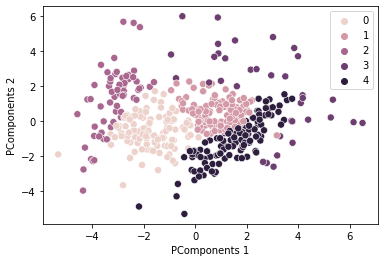

In [ ]:

sns.scatterplot(data= reduced_pca_data, s=50, x = 'PComponents 1',y = 'PComponents 2',hue=clusterer.predict(reduced_pca_data))

# **Final Conclusion & Recomendations**

As per our results, segment 0 represents the customers that sell food to prepare themselves ( supermarket, foodstores, retailers) and Segment 1 represent the customers who sell made food like, resturants , cafes etc.

Assuming that if the owner made a slight change inorder to enhance its services having impact on sale. He decided to change his delivery from 5 days to 3 days.

Impact:

1. It would have minimimal impact on customers with 'segment 0' coz these are food items whic can kept in stock.

2. It would have higher impact on customers with 'segment 1' as they need to prepare the food and delievered when needed, so they would most likely be the candidate for 3 days deleivery.